In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
customers = pd.read_csv('Project/Customers.csv')
products = pd.read_csv('Project/Products.csv')
transactions = pd.read_csv('Project/Transactions.csv')

In [5]:
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [6]:
print(customers.dtypes)
print(transactions.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [7]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272   

In [8]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
print(transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


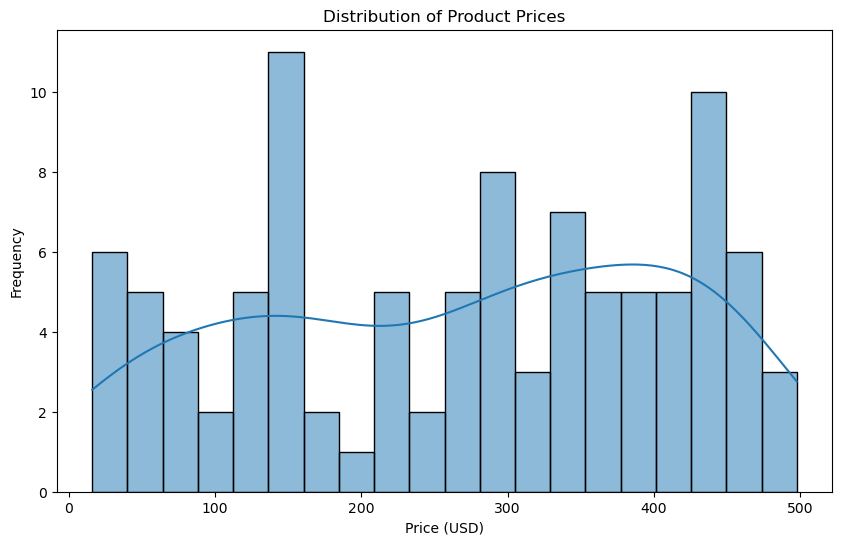

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [12]:
total_sales_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
total_sales_by_region['TotalValue'] = total_sales_by_region['Quantity'] * total_sales_by_region['Price']
region_sales = total_sales_by_region.groupby('Region')['TotalValue'].sum().reset_index()

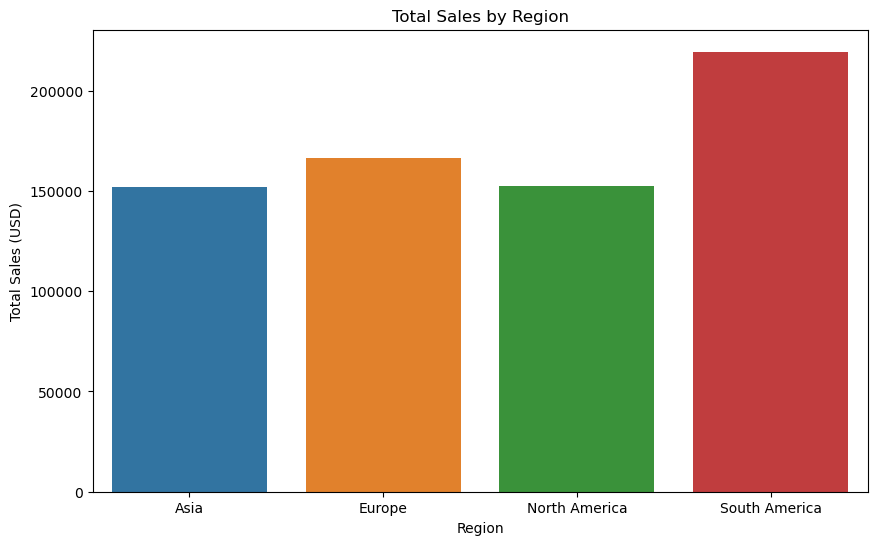

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

In [16]:
# Ensure 'Month' is in datetime format or period (like 'YYYY-MM')
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

# Recalculate monthly sales
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

# Convert 'Month' back to a string for plotting purposes
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

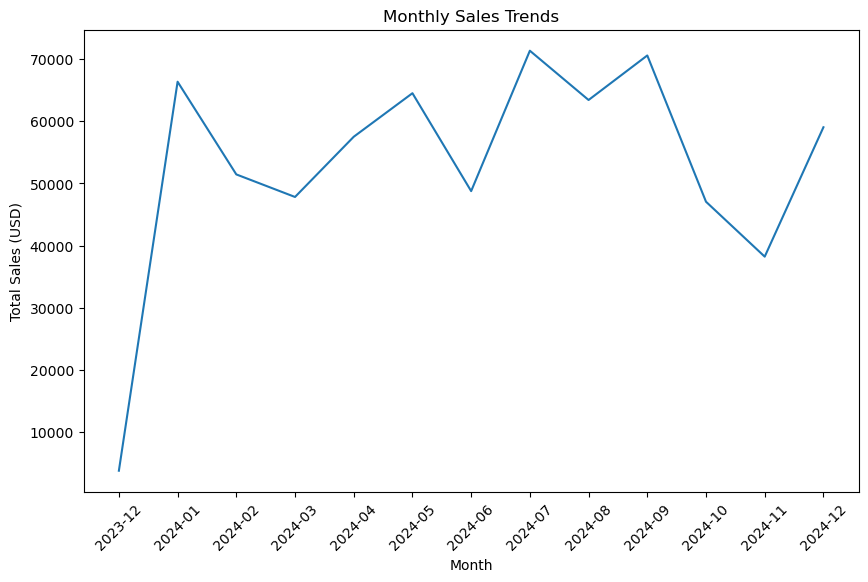

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TotalValue', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

In [18]:
# 9. Top 5 best-selling products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = top_products.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')
top_5_products = top_products.sort_values('Quantity', ascending=False).head(5)


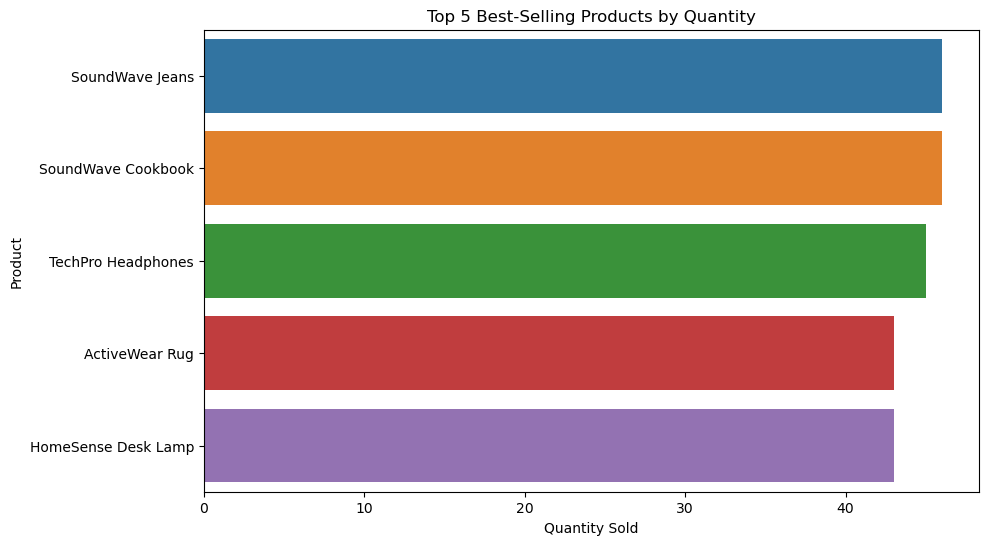

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_5_products)
plt.title('Top 5 Best-Selling Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

In [22]:
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')

new_customers = customers.groupby('SignupMonth').size().reset_index(name='NewCustomers')

new_customers['SignupMonth'] = new_customers['SignupMonth'].astype(str)

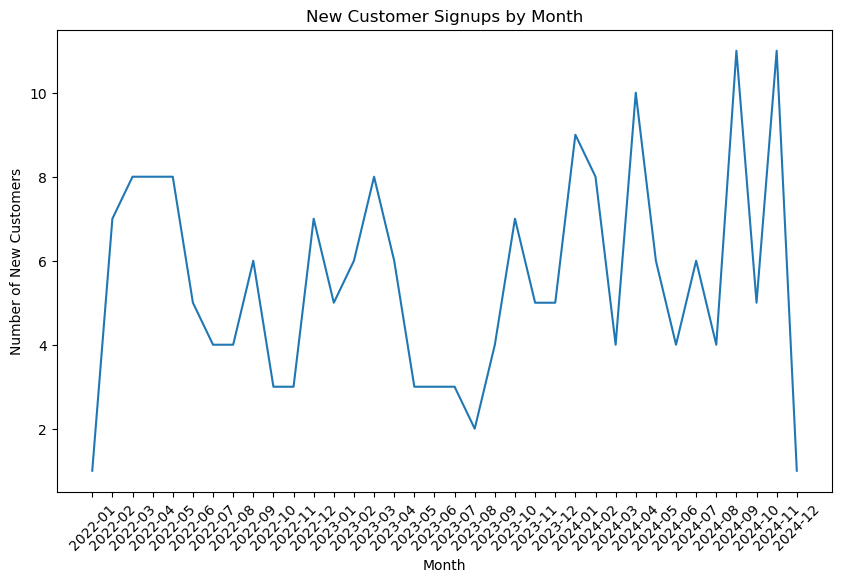

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='SignupMonth', y='NewCustomers', data=new_customers)
plt.title('New Customer Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.show()